### Identifying the hosting environment

When you create a `WebApplicationBuilder` instance in ***Program.cs***, it
***automatically*** sets up the `hosting environment` for your application.

***WebApplicationBuilder*** looks for a magic ***environment variable*** called
`ASPNETCORE_ENVIRONMENT`, uses it to create an `IHostEnvironment` object,
and exposes it as `WebApplicationBuilder.Environment`

You can use either the `DOTNET_ENVIRONMENT` or `ASPNETCORE_ENVIRONMENT`. `ASPNETCORE_` value ***overrides*** the `DOTNET_` value if both are set

<div dir="rtl" style="margin:auto; width:90%; font-family:vazirmatn;">

<h5><code>IHostEnvironment</code> و ویژگی‌های آن</h5>
<p><code>IHostEnvironment</code> یک رابط است که اطلاعاتی درباره محیط اجرایی برنامه فراهم می‌کند. یکی از ویژگی‌های مهم این رابط، <strong><code>ContentRootPath</code></strong> است.</p>
<ul><li><strong><code>ContentRootPath</code></strong>:<ul><li>این ویژگی نشان می‌دهد که ریشه محتوا (Content Root) کجاست. به عبارت دیگر، <code>ContentRootPath</code> مسیری را مشخص می‌کند که برنامه می‌تواند فایل‌های پیکربندی مانند <code>appsettings.json</code> را در آن پیدا کند.</li><li>این مسیر به طور معمول همان مسیری است که برنامه در آن اجرا می‌شود. برای مثال، اگر برنامه شما در یک پوشه خاص قرار دارد، <code>ContentRootPath</code> به آن پوشه اشاره می‌کند.</li><li><code>ContentRootPath</code> برای دسترسی به فایل‌هایی که توسط برنامه استفاده می‌شوند، اما مستقیماً به مرورگر کاربر ارائه نمی‌شوند (مثل فایل‌های پیکربندی، فایل‌های داده و دیگر منابع برنامه) استفاده می‌شود.</li></ul></li></ul>
<h5><code>IWebHostEnvironment</code> و ویژگی‌های آن</h5>
<p><code>IWebHostEnvironment</code> یک رابط دیگر است که از <code>IHostEnvironment</code> مشتق شده و در اپلیکیشن‌های وب ASP.NET Core استفاده می‌شود. این رابط علاوه بر ویژگی‌هایی که در <code>IHostEnvironment</code> وجود دارد، ویژگی‌های دیگری هم اضافه می‌کند که برای مدیریت محیط‌های وب مفید هستند.</p>
<ul><li><strong><code>WebRootPath</code></strong>:<ul><li>این ویژگی مسیر ریشه وب (Web Root) را مشخص می‌کند. <code>WebRootPath</code> مسیر دایرکتوری‌ای را که فایل‌های استاتیک (مثل تصاویر، CSS، جاوااسکریپت و غیره) در آن قرار دارند، نشان می‌دهد.</li><li>به طور پیش‌فرض، این مسیر پوشه‌ای به نام <code>wwwroot</code> در پروژه ASP.NET Core است.</li><li>فایل‌های داخل این پوشه مستقیماً قابل دسترسی از طریق مرورگر هستند، به این معنی که کاربران می‌توانند از طریق URL‌ها به این فایل‌ها دسترسی داشته باشند.</li></ul></li></ul>
<h5>تفاوت بین <code>ContentRootPath</code> و <code>WebRootPath</code></h5>
<ul><li><p><strong><code>ContentRootPath</code></strong> برای فایل‌هایی استفاده می‌شود که برنامه به آن‌ها نیاز دارد اما کاربران مستقیماً به آن‌ها دسترسی ندارند (مثل <code>appsettings.json</code>، فایل‌های داده، و غیره). این مسیر، ریشه کل برنامه است.</p></li><li><p><strong><code>WebRootPath</code></strong> برای فایل‌هایی استفاده می‌شود که قرار است مستقیماً توسط مرورگر بارگیری شوند، مانند فایل‌های استاتیک (HTML، CSS، جاوااسکریپت، تصاویر و غیره). این مسیر به طور پیش‌فرض پوشه <code>wwwroot</code> است.</p></li></ul>
</div>

The `IHostEnvironment.EnvironmentName` property ***can be any value***, but you should stick to three commonly used values in most cases

- `Development`  
  
- `Staging`
- `Production`

In [ ]:
IHostEnvironment.IsDevelopment()
IHostEnvironment.IsStaging()
IHostEnvironment.IsProduction()
IHostEnvironment.IsEnvironment(string environmentName)

//these methods dont case-sensitive

### Loading environment-specific configuration files

The `EnvironmentName` value is determined, ***which configuration values*** are loaded when the `IConfiguration` is built

environment-specific `appsettings.ENVIRONMENT.json` file that’s loaded ***after*** the **default** `appsettings.json` file

In [ ]:
//by default WebApplication Builder do this

WebApplicationBuilder builder = WebApplication.CreateBuilder(args);

IHostEnvironment env = builder.Environment; 

builder.Configuration.Sources.Clear();

builder.Configuration
    .AddJsonFile(
        "appsettings.json",
        optional: false) 
    .AddJsonFile( 
        $"appsettings.{env.EnvironmentName}.json",
        Optional: true);

WebApplication app = builder.Build();

app.MapGet("/", () =>"Hello world!");

app.Run();

Any settings in these files will `overwrite` values from the ***global appsettings.json***

In [ ]:
WebApplicationBuilder builder = WebApplication.CreateBuilder(args);

IHostEnvironment env = builder.Environment; 

builder.Configuration.Sources.Clear();

builder.Configuration
    .AddJsonFile(
        "appsettings.json",
        optional: false) 
    .AddJsonFile( 
        $"appsettings.{env.EnvironmentName}.json",
        Optional: true);

if(env.IsDevelopment()) 
{
    builder.Configuration.AddUserSecrets<Program>();
}

WebApplication app = builder.Build();

app.MapGet("/", () =>"Hello world!");

app.Run();

<div dir="rtl" style="margin:auto; width:90%; font-family:vazirmatn;">
<ul>
<li>شما می‌توانید رابط <strong><code>IHostEnvironment</code></strong> را در هر جایی از برنامه خود تزریق کنید تا اطلاعاتی در مورد محیط اجرایی (مثل محیط توسعه، تولید، تست) به دست آورید.</li>
<li>با این حال، 
 بهتر است از تزریق مستقیم <code>IHostEnvironment</code> در سرویس‌های خود، خارج از فایل <code>Program.cs</code> خودداری کنید. زیرا این کار می‌تواند باعث پیچیدگی و وابستگی‌های غیرضروری در سرویس‌های شما شود.</li></ul>
</div>

### Setting the hosting environment

If your ***ASP.NET Core*** application ***can’t find*** an `ASPNETCORE_ENVIRONMENT`
environment variable when it starts up, it ***defaults*** to a `production` environment

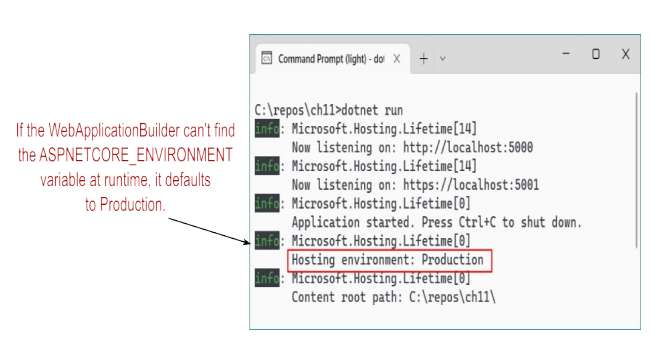

Another option is to use a `launchSettings.json` file to control the environment.
All the default ASP.NET Core applications include this file in the `Properties
folder`.

In [ ]:
{
  "iisSettings": {
    "windowsAuthentication": false,
    "anonymousAuthentication": true,
    "iisExpress": {
      "applicationUrl": "http://localhost:45255",
      "sslPort": 44332
    }
  },
  "profiles": {
    "ASPNETCoreInAction.Services": {
      "commandName": "Project",
      "dotnetRunMessages": true,
      "launchBrowser": true,
      "applicationUrl": "https://localhost:7075;http://localhost:5243",
      "environmentVariables": {
        "ASPNETCORE_ENVIRONMENT": "Development"
      }
    },
    "IIS Express": {
      "commandName": "IISExpress",
      "launchBrowser": true,
      "environmentVariables": {
        "ASPNETCORE_ENVIRONMENT": "Development"
      }
    }
  }
}


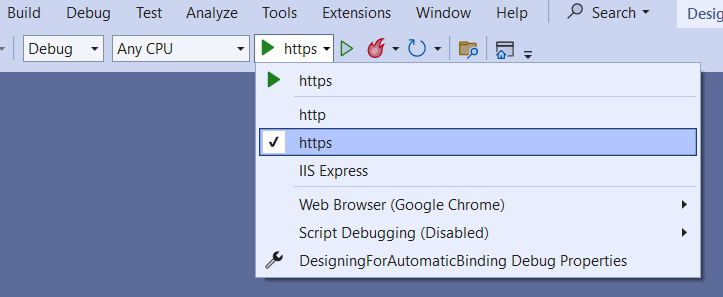

you can edit profiles in visual studio

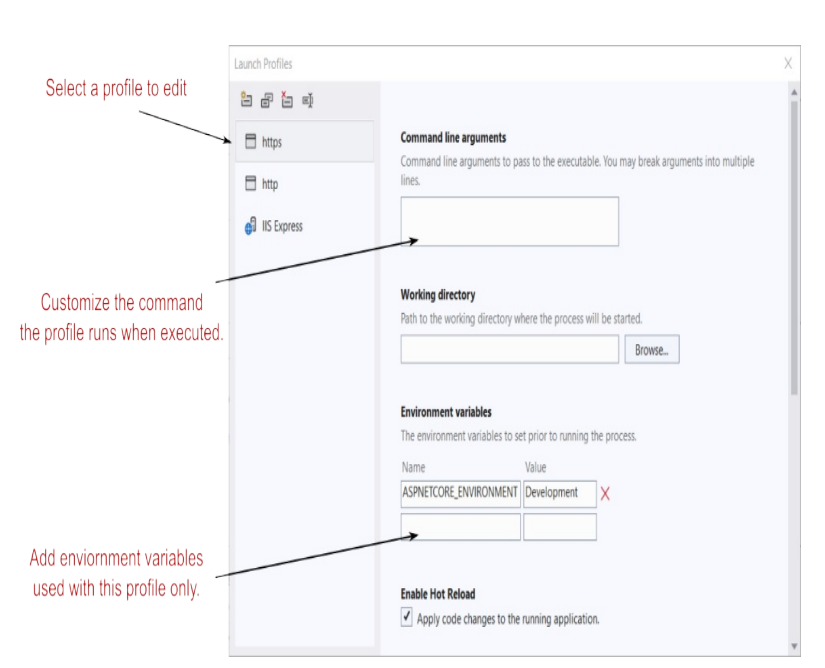

you can set environment by `command-line argument`

In [ ]:
dotnet run --no-launch-profile --environment Staging